In [1]:
import pandas as pd
import seaborn as sns
import os
from collections import defaultdict
from tqdm import tqdm

In [4]:
LOGS_FOLDER = "/mnt/c/Users/Diego/Documents/Università/alphazero_singleplayer/logs/RaceStrategy-v2/results"
DATA_FOLDER = "2020-10-11_18-26_1000b"
directory = os.path.join(LOGS_FOLDER, DATA_FOLDER)
dfs = defaultdict(dict)
for entry in tqdm(os.scandir(directory)):
    if entry.is_file:
        filename = entry.name
        filename = filename[:-4]
        tokens = filename.split('_')
        timestamp = tokens.pop(0)
        df = pd.read_csv(entry.path)
        dfs[tokens[0] + "_" + timestamp][tokens[2]] = df
        dfs[tokens[0] + "_" + timestamp]['year'] = tokens[1]

40it [00:00, 274.74it/s]


In [5]:
database = pd.DataFrame(columns=['race', 'year', 'lap', 'driver', 'lap_time', 'cumulative_time', 'influence', 'position', 'id'])
index = 0
for race_id in tqdm(dfs):
    tokens = race_id.split('_')
    timestamp = tokens[1]
    race = tokens[0]
    year = dfs[race_id]['year']

    lap_times = dfs[race_id]['laptimes']
    influences = dfs[race_id]['lapinfluences']
    positions = dfs[race_id]['positions']
    race_times = dfs[race_id]['racetimes']
    
    columns = list(lap_times.columns)
    columns.remove('lap')

    for lap in lap_times.lap.unique():
        lap_time_single_lap = lap_times.loc[lap_times['lap'] == lap]
        influences_single_lap = influences.loc[influences['lap'] == lap]
        positions_single_lap = positions.loc[positions['lap'] == lap]
        race_times_single_lap = race_times.loc[race_times['lap'] == lap]
        for col in columns:
            index += 1
            new_df = {}
            new_df['id'] = [timestamp]
            new_df['race'] = [race]
            new_df['year'] = [year]
            new_df['lap'] = [lap]
            new_df['driver'] = [col]
            new_df['lap_time'] = lap_time_single_lap[col].values
            new_df['influence'] = influences_single_lap[col].values
            new_df['cumulative_time'] = race_times_single_lap[col].values
            new_df['position'] = positions_single_lap[col].values
            new_df = pd.DataFrame(new_df, index=[index])
            database = pd.concat([database, new_df])


database.describe()


100%|██████████| 10/10 [00:52<00:00,  5.29s/it]


,lap_time,cumulative_time
count,13200.000000,13200.000000
mean,91.499080,3077.104371
std,5.911297,1750.306846
min,83.480000,92.495000
25%,89.034750,1558.126250
50%,90.031000,3052.385500
75%,91.372250,4605.185750
max,136.893000,6210.738000


In [6]:
database

,race,year,lap,driver,lap_time,cumulative_time,influence,position,id
1,Catalunya,2017,1,VAN,102.708,102.708,none,18,1602433666499
2,Catalunya,2017,1,RIC,96.099,96.099,none,6,1602433666499
3,Catalunya,2017,1,VET,94.396,94.396,none,2,1602433666499
4,Catalunya,2017,1,RAI,95.200,95.200,none,4,1602433666499
5,Catalunya,2017,1,GRO,99.508,99.508,none,10,1602433666499
...,...,...,...,...,...,...,...,...,...
13196,Catalunya,2017,66,VER,94.942,6126.883,none,19,1602434403067
13197,Catalunya,2017,66,HAM,86.481,5880.234,none,1,1602434403067
13198,Catalunya,2017,66,SAI,87.620,6001.265,none,5,1602434403067
13199,Catalunya,2017,66,BOT,91.463,5977.945,none,3,1602434403067


<AxesSubplot:xlabel='lap', ylabel='lap_time'>

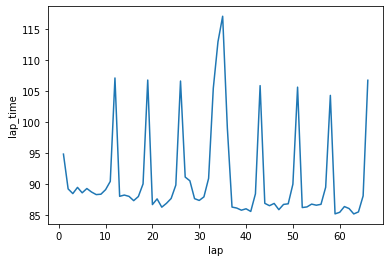

In [7]:
vettel = database.loc[(database['driver'] == 'VET') & (database['race'] == 'Catalunya') & (database['id'] == database['id'].unique()[4])]
vettel = vettel.sort_values('lap')
pits = []
for index, row in vettel.iterrows():
    if 'pitinlap' in row['influence']:
        pits.append(row['lap'])
sns.lineplot(data=vettel, y='lap_time', x='lap')

In [26]:
pits

[]

In [13]:
vettel

,race,year,lap,driver,lap_time,cumulative_time,influence,position,id
